# Section 1: Introduction to NumPy

## Importing Modules
If vanilla python seems rather lackluster, that's because it is. Fortunately, the scientific stack adds a broad and powerful array of python packages fill in the gaps. Once installed, packages in python are easily loaded for use.

In [1]:
import numpy as np
print(np.__version__)

1.16.3


Commands from packages are like attributes of objects. For convenience, we will import packages using shorthand.

## NumPy Arrays
### Why arrays improve on lists
Arrays are the most basic type of the NumPy package. NumPy arrays are vectors (Nx1), similar to pythonic lists. In contrast to lists, however, arrays have many more attributes and can be modified in substantially more ways. Several examples are provided below demonstrating the improvement of arrays over lists.

In [2]:
## Define example list.
example_list = list(range(5))

print(example_list)
print(example_list * 3)            # scalar * list
print(example_list * example_list) # list * list

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


TypeError: can't multiply sequence by non-int of type 'list'

In contrast, NumPy arrays can be modified in this way. We use the `np.arange` command to initialize an array of sequential integers.

In [3]:
arr = np.arange(5)

print(arr, type(arr))
print(arr * 3)
print(arr * arr)

[0 1 2 3 4] <class 'numpy.ndarray'>
[ 0  3  6  9 12]
[ 0  1  4  9 16]


Every array has an object type. These can be looked up and modified.

In [4]:
print(arr, arr.dtype)   # Print current datatype.
arr = arr.astype(float) # Conver to float.
print(arr, arr.dtype)   # Print new datatype.

[0 1 2 3 4] int64
[0. 1. 2. 3. 4.] float64


Numpy arrays store metadata about their contents. These can be helpful, especially the **shape** atribute.

In [5]:
print('Array shape:', arr.shape) # Print shape of array.
print('Array size:', arr.size)  # Print number of total elements.

Array shape: (5,)
Array size: 5


Accessing elements is easy.

In [6]:
print(arr[:2])
print(arr[[1,3,4]])

[0. 1.]
[1. 3. 4.]


Arrays now have a number of other built-in attributes 
not available for lists.

In [7]:
print('Round:', arr.round()) # Round array.
print('Min:', arr.min())     # Get max of array.
print('Max:', arr.max())     # Get min of array.
print('Sum:', arr.sum())     # Get sum of array.
print('Mean:',arr.mean())    # Get mean of array.

Round: [0. 1. 2. 3. 4.]
Min: 0.0
Max: 4.0
Sum: 10.0
Mean: 2.0


### Generating NumPy Arrays
There are many ways of generating NumPy arrays. The most simple way is to convert a Python list to NumPy array using the **array** command.

In [8]:
## Making an array from a list using the array command.
example_list = [4, 7, 9.4]
arr = np.array(example_list)

print(example_list, type(example_list))
print(arr, type(arr)) 

[4, 7, 9.4] <class 'list'>
[4.  7.  9.4] <class 'numpy.ndarray'>


NumPy has recreated all of the standard R/Matlab commands for 
generating arrays.

In [9]:
print('np.arange(5)        = %s' %np.arange(5))         # Array of 5 sequential integers.
print('np.zeros(5)         = %s' %np.zeros(5))          # Array of 5 zeros.
print('np.ones(5)          = %s' %np.ones(5))           # Array of 5 ones.
print('np.linspace(0,10,5) = %s' %np.linspace(0,10,5))  # Length-5 evenly-spaced array from 0 to 10.
print('np.logspace(0,2,5) = %s' %np.logspace(0,2,5))    # Length-5 logarithmically-spaced array.

np.arange(5)        = [0 1 2 3 4]
np.zeros(5)         = [0. 0. 0. 0. 0.]
np.ones(5)          = [1. 1. 1. 1. 1.]
np.linspace(0,10,5) = [ 0.   2.5  5.   7.5 10. ]
np.logspace(0,2,5) = [  1.           3.16227766  10.          31.6227766  100.        ]


## NumPy Matrices
### Why matrices improve on lists
It is possible to represent matrices in pythonic lists, though it is inefficient. Similar to the benefits of arrays, NumPy matrices dramatically improve upon the numerical capabilities of core python. Python can technically represent matrices as a list of lists.

In [10]:
nested_lists = [[1,2,3],
                [4,5,6],
                [7,8,9]]

print(nested_lists)
print(nested_lists[1][2])   # To extract the 2nd row, 3rd column, two brackets are necessary.

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
6


NumPy matrices make this much easier!

In [11]:
mat = np.array(nested_lists)

print(mat)
print(mat[1,2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
6


Indexing of NumPy matrices (and arrays for that matter) obey all of the slicing conventions of lists. Commas are used to demarcate which axis a slice operation is targeting.

In [12]:
print('mat[1,2]  = %s' %mat[1,2])    # Second row, third column.
print('mat[0,:]  = %s' %mat[0,:])    # All the first row.
print('mat[:,-1] = %s' %mat[:,-1])   # All of the final column.

mat[1,2]  = 6
mat[0,:]  = [1 2 3]
mat[:,-1] = [3 6 9]


NumPy matrices have all the same attributes of NumPy arrays, but now functions can be applied to specific rows or columns in addition to the entire matrix.

In [13]:
## Sum across matrix.
print( mat.sum() )          

45


In [14]:
## Sum across columns.
print( mat.sum(axis=0) )

[12 15 18]


In [15]:
## Sum across rows.
print( mat.sum(axis=1) )

[ 6 15 24]


Importantly, all NumPy arrays and matrices have a **reshape** attribute allowing for transforming matrices into different dimensions.

In [16]:
print('Original shape', mat.shape)

# Reshape to column vector
mat = mat.reshape(9,1)
print('Column vector', mat.shape)

# Reshape to column vector
mat = mat.reshape(1,9)
print('Row vector', mat.shape)

Original shape (3, 3)
Column vector (9, 1)
Row vector (1, 9)


Importantly, reshape can be used to change the shape of NumPy arrays. The order flag can also change how they are organized (row-ordered vs. column-ordered).

In [17]:
print('Original:', mat)

Original: [[1 2 3 4 5 6 7 8 9]]


In [18]:
## Reshape (column organized)
print(mat.reshape(3,3,order='C'))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [19]:
## Reshape (row organized)
print(mat.reshape(3,3,order='F')) 

[[1 4 7]
 [2 5 8]
 [3 6 9]]


The dimensions of matrices can also be quickly changed with **flatten** and **squeeze**. 

In [20]:
## Reshape to new dimensions.
mat = mat.reshape(3,3,1)
print('Original:', mat.shape)

## Flatten matrix.
print('Flatten:', mat.flatten().shape )

## Squeeze matrix.
print('Squeeze:', mat.squeeze().shape )

Original: (3, 3, 1)
Flatten: (9,)
Squeeze: (3, 3)


### Generating NumPy Matrices
Just as with arrays, there are a number of ways of generating NumPy matrices. The simplest is to use the **array** command on a list of lists. 

In [21]:
nested_lists = [[0, 1, 1],[2, 3, 5], [8, 13, 21]]
mat = np.array(nested_lists)

print(nested_lists)
print(mat)

[[0, 1, 1], [2, 3, 5], [8, 13, 21]]
[[ 0  1  1]
 [ 2  3  5]
 [ 8 13 21]]


The same commands previously introduced to generate NumPy arrays can also be used to generate matrices. Simply specify extra dimensions.

In [22]:
np.zeros( [3,3] )               # 3x3 matrix of zeros.
np.ones( [3,3] )                # 3x3 matrix of ones.
np.arange(9).reshape(3,3)       # 3x3 matrix of sequential integers.
np.linspace(0,8,9).reshape(3,3) # 3x3 matrix evenly-spaced array from 0 to 8. 
np.identity(3)                  # 3x3 identity matrix.

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Matrices can also be formed by joining NumPy arrays. There are several methods for doing this, including: `row_stack`/`r_`, `column_stack`/`c_`, `hstack`, `vstack`, and `concatenate`. We demonstrate each below. 

In [23]:
arr = np.arange(5)
print(arr)

## Join rows.
rows = np.row_stack([arr,arr])
print(rows)

## Join columns.
cols = np.column_stack([arr,arr])
print(cols)

[0 1 2 3 4]
[[0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]]


In [24]:
## np.hstack = join arrays along their columns.
print(np.hstack([arr,arr]))
print(np.hstack([arr.reshape(5,1), arr.reshape(5,1)]))

[0 1 2 3 4 0 1 2 3 4]
[[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]]


In [25]:
## np.vstack = join arrays along their rows.
np.vstack([arr,arr])
print(np.vstack([arr.reshape(5,1), arr.reshape(5,1)]))

[[0]
 [1]
 [2]
 [3]
 [4]
 [0]
 [1]
 [2]
 [3]
 [4]]


In [26]:
## np.concatenate = join arrays along specified axis.
## Default is first axis.
print(np.concatenate([arr, arr], axis=0))
print(np.concatenate([arr.reshape(5,1), arr.reshape(5,1)], axis=1))

[0 1 2 3 4 0 1 2 3 4]
[[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]]


In a pinch, one can also use `np.array` to concatenate arrays along the first axis.

In [27]:
print(np.array([arr,arr]))

[[0 1 2 3 4]
 [0 1 2 3 4]]


### Generating Random Data
NumPy also includes many functions for generating random data. 

In [28]:
## Set the RNG seed!
np.random.seed(47404)

In [29]:
## Generate ten random integers between 0-9.
print( np.random.randint(0,10,10) )

[9 0 2 0 2 4 3 4 6 5]


In [30]:
## Generate five random samples of a normal distribution with mu=0,sd=1.
print( np.random.normal(0,1,5) )

[-1.46523567  0.72885891 -0.73496833 -0.38356834 -0.29662156]


In [31]:
## Generate 10 random coin flips.
print( np.random.binomial(1,0.5,10))

[1 1 0 0 1 0 0 1 1 0]


In [32]:
## Choose five numbers from 0-9 without replacement.
print( np.random.choice(np.arange(10), 5, replace=False) )

[8 2 9 7 6]


## Indexing, Masking, and Assignments

NumPy supports a great many ways of indexing.

In [33]:
## Construct an arbitrary matrix.
mat = np.random.randint(0,10,(10,10))

## Access particular rows.
mat[:1]

## Access particular columns.
mat[:,:5]

## Access particular rows/columns.
mat[:5,5:]

## Access using lists of indexes.
mat[[1,3,5],[5,1,2]]

array([5, 5, 5])

Far more useful is indexing with boolean arrays.

In [34]:
## Return all elements of matrix that meet criterion.
mat[mat > 5]

## Return all rows that begin with particular integer.
mat[mat[:,0] == 1]

## Return all columns whose sum is greater than 40.
mat[:,mat.sum(axis=0) > 40]

array([[4, 6, 6, 5, 9],
       [1, 9, 1, 5, 8],
       [1, 7, 9, 4, 5],
       [0, 5, 8, 9, 9],
       [7, 9, 4, 9, 8],
       [8, 2, 5, 2, 6],
       [6, 0, 7, 2, 0],
       [1, 3, 2, 8, 2],
       [8, 2, 0, 9, 8],
       [8, 4, 5, 2, 9]])

For larger matrices, we can use the ellipsis as a shorthand.

In [35]:
mat = np.random.randint(0,9,(5,5,5,5))
mat[0,...,-1]

array([[4, 8, 3, 2, 4],
       [8, 8, 3, 0, 3],
       [7, 8, 4, 2, 1],
       [3, 3, 0, 3, 5],
       [8, 3, 4, 2, 0]])

Like pythonic lists, we can update NumPy arrays in place.

In [36]:
## Construct an arbitrary matrix.
mat = np.random.randint(0,10,(10,10))

## Update first element.
mat[0,0] = 99

## Update full row.
mat[3,:] = -99

## Update multiple columns.
mat[:,-2:] = 0

This also allows for convenient masking.

In [37]:
mat[mat !=0 ] = 0
mat

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

For a complete list of convenient routines, see the [NumPy indexing documentation](https://docs.scipy.org/doc/numpy/user/basics.indexing.html#).

## Core NumPy Functions
NumPy also introduces a [number of useful functions](https://docs.scipy.org/doc/numpy/reference/) designed to operate efficiently over NumPy arrays. The following is a non-exhaustive overview of some important NumPy functions.

### Mathematical functions

NumPy includes a variety of mathematical functions. All of these can be applied across an entire matrix or across arrays.

In [38]:
np.sum;       # Sum of an array or matrix.
np.cumsum;    # Cumulative sum over an array.
np.prod;      # Element-wise multiplication of an array.
np.divide;    # Element-wise division of two arrays.
np.diff;      # Pairwise difference of elements of an array.
np.exp;       # Exponential transform.
np.log;       # Natural logarithm.
np.log10;     # Base-10 logarithm.

### Rounding Functions

In [39]:
mat = np.linspace(0,1,5)
print('Original: %s' %mat)
print('np.round: %s' %np.round(mat, 1) )
print('np.floor: %s' %np.floor(mat) ) 
print('np.ceil:  %s' %np.ceil(mat) )

Original: [0.   0.25 0.5  0.75 1.  ]
np.round: [0.  0.2 0.5 0.8 1. ]
np.floor: [0. 0. 0. 0. 1.]
np.ceil:  [0. 1. 1. 1. 1.]


### Summary Functions

NumPy includes many functions to summarize an array. With the exception of `np.corrcoef`, all of these can be
applied across an entire matrix or across arrays.

In [40]:
np.min;           # Return the smallest element.
np.max;           # Return the largest element.
np.argmin;        # Return the index of the smallest element.
np.argmax;        # Return the index of the largest element.
np.mean;          # Compute the mean of an array.
np.median;        # Compute the median of an array.
np.std;           # Compute the standard deviation of an array.
np.var;           # Compute the variance (sd^2) of an array.
np.percentile;    # Compute the xth percentile of an array.
np.corrcoef;      # Compute the row-/col-wise correlation of a matrix.

In [41]:
## To give a few examples.
mat = np.vstack([ np.arange(5), np.arange(5)[::-1] ])
print('Original:\n%s' %mat)

Original:
[[0 1 2 3 4]
 [4 3 2 1 0]]


In [42]:
## Compute percentile.
print( '70%% (all):  %s' %np.percentile(mat, 70) )

## Compute mean across rows.
print('70%% (rows): %s' %np.percentile(mat, 70, axis=1) )

## Compute mean across cols.
print('70%% (cols): %s' %np.percentile(mat, 70, axis=0) )

70% (all):  3.0
70% (rows): [2.8 2.8]
70% (cols): [2.8 2.4 2.  2.4 2.8]


In [43]:
## Compute correlation.
print('Correlation:\n', np.corrcoef(mat))

Correlation:
 [[ 1. -1.]
 [-1.  1.]]


### Set Functions
NumPy includes functions for identifying unique elements within or between arrays.

In [44]:
## Define two arrays for example.
arr1 = np.array([41, 16, 34, 0, 2, 20, 19, 14, 22, 15, 18, 9, 35, 41])
arr2 = np.array([42, 22, 40, 7, 33, 0, 12, 19, 44, 10, 31, 11, 11, 49])

In [45]:
## Sort elements (ascending order).
np.sort(arr1)

array([ 0,  2,  9, 14, 15, 16, 18, 19, 20, 22, 34, 35, 41, 41])

In [46]:
## Return unique elements.
np.unique(arr1)

array([ 0,  2,  9, 14, 15, 16, 18, 19, 20, 22, 34, 35, 41])

In [47]:
## Return unique elements, count number of appearances.
np.unique(arr1, return_counts=True)

(array([ 0,  2,  9, 14, 15, 16, 18, 19, 20, 22, 34, 35, 41]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]))

In [48]:
## Find the elements of array-1 in array-2.
np.in1d(arr1, arr2)

array([False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False])

In [49]:
## Return all unique elements of arrays 1 & 2.
np.union1d(arr1, arr2)

array([ 0,  2,  7,  9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 22, 31, 33, 34,
       35, 40, 41, 42, 44, 49])

In [50]:
## Return all elements belonging to both arrays 1 & 2.
np.intersect1d(arr1, arr2)

array([ 0, 19, 22])

### Replacing List Comprehensions

NumPy includes a number of very helpful functions that act to replace list comprehensions (np.where) and for loops (np.apply_across_axis, np.apply_over_axes). These are often more efficient than writing out a full For loop. We will emphasize these functions with a simple example of standard-scoring (z-scoring) a matrix.

In [51]:
## Define the standard score (z-score) function.
def zscore(arr): 
    return (arr - arr.mean()) / arr.std()

## Define a simple matrix.
mat = np.arange(12).reshape(2,6)
print(mat)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


Use `np.apply_across_axis` to apply our function across each row.

In [52]:
zmat = np.apply_along_axis(zscore, axis=1, arr=mat)
print(zmat.round(2))

[[-1.46 -0.88 -0.29  0.29  0.88  1.46]
 [-1.46 -0.88 -0.29  0.29  0.88  1.46]]


Use the `np.where` command to set all negative numbers to 0, else 1. 

In [53]:
amat = np.where(zmat < 0, 0, 1)
print(amat)

[[0 0 0 1 1 1]
 [0 0 0 1 1 1]]


If no transforms are specified, `np.where` returns the indices of the array where the conditional is met.

In [54]:
print( np.where(zmat < 0 ) )

(array([0, 0, 0, 1, 1, 1]), array([0, 1, 2, 0, 1, 2]))


This also means `np.where` is especially useful for indexing and masking!

In [55]:
mat[zmat > 0]

array([ 3,  4,  5,  9, 10, 11])

### Matrix Math

NumPy supports matrix operations. The simplest operator is transposition.

In [56]:
## Generate random matrix.
X = np.random.normal(0,1,(5,5))

print(X)      # Print original matrix.
print(X.T)    # Print transposed matrix.

[[ 1.44079248 -0.0362348  -0.88641392  1.37089285 -0.33915043]
 [-1.39945177 -1.50017374  0.83809224 -0.14407853 -0.16147255]
 [ 1.28696005 -1.12191896 -0.31293446  0.82460362 -0.66724436]
 [-0.94033096 -0.17241146 -1.37716311 -1.38508138  2.44803326]
 [ 0.71373219  0.92525131 -0.07017569 -2.78569811  1.53814096]]
[[ 1.44079248 -1.39945177  1.28696005 -0.94033096  0.71373219]
 [-0.0362348  -1.50017374 -1.12191896 -0.17241146  0.92525131]
 [-0.88641392  0.83809224 -0.31293446 -1.37716311 -0.07017569]
 [ 1.37089285 -0.14407853  0.82460362 -1.38508138 -2.78569811]
 [-0.33915043 -0.16147255 -0.66724436  2.44803326  1.53814096]]


The shorthand for matrix multiplication uses the **@** operator.

In [57]:
X @ X

array([[-0.54534303,  0.44647925, -2.89426011,  0.29542518,  2.94299036],
       [ 1.18192577,  1.23639662, -0.06930728, -0.36188743, -0.44342736],
       [ 1.7699456 ,  1.2279879 , -3.07191226,  2.3844801 ,  0.94583103],
       [ 0.16378088,  4.34163515,  2.85567811, -7.30089709,  1.64035261],
       [ 3.36048097,  0.56828499,  3.89316476,  0.3608966 , -4.79824495]])

The **@** operator can be substituted with ``np.dot``. 

In [58]:
## Matrix multiplcation (v1).
v1 = np.dot(X,X)

## Matrix multiplcation (v2).
v2 = X.dot(X)

## Assert all equal.
np.all(v1 == v2)

True

Similarly, NumPy supports inner and outer products.

In [59]:
x = np.random.normal(0,1,size=5)

## Inner product.
inner = np.inner(x,x)
print(inner)

## Outer product.
outer = np.outer(x,x)
print(outer)

12.644930503387657
[[ 0.45275409 -0.2960396  -1.43918901  0.13217017  1.82857439]
 [-0.2960396   0.19356964  0.94103389 -0.08642132 -1.19563897]
 [-1.43918901  0.94103389  4.57481238 -0.42013504 -5.81256854]
 [ 0.13217017 -0.08642132 -0.42013504  0.03858376  0.53380631]
 [ 1.82857439 -1.19563897 -5.81256854  0.53380631  7.38521064]]


### Linear Algebra Functions

NumPy includes an entire submodule dedicated to efficient linear algebra functions (though it should be noted that SciPy has reimplemented them for maximal efficiency). See np.linalg for a full list of commands.

In [60]:
## Define a simple matrix.
mat = np.arange(16).reshape(4,4)
print(mat)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [61]:
## Return diagonal of matrix
print(np.diag(mat))

[ 0  5 10 15]


In [62]:
## Return upper triangular matrix
print(np.triu(mat))    

[[ 0  1  2  3]
 [ 0  5  6  7]
 [ 0  0 10 11]
 [ 0  0  0 15]]


In [63]:
## Matrix multiply itself. Can also np.dot.
print(np.dot(mat, mat))    

[[ 56  62  68  74]
 [152 174 196 218]
 [248 286 324 362]
 [344 398 452 506]]


In [64]:
## Can also use:
print(mat.dot(mat))

[[ 56  62  68  74]
 [152 174 196 218]
 [248 286 324 362]
 [344 398 452 506]]


In [65]:
## Linear algebra operations include:
np.linalg.norm;        # Vector or matrix norm
np.linalg.inv;         # Inverse of a square matrix
np.linalg.det;         # Determinant of a square matrix
np.linalg.eig;         # Eigenvalues and vectors of a square matrix
np.linalg.cholesky;    # Cholesky decomposition of a matrix
np.linalg.svd;         # Singular value decomposition of a matrix
np.linalg.lstsq;       # Solve linear least-squares problem

### Brief Note on NaNs

NumPy has a unique NaN class. `np.nan` dominates all other numeric types.

In [66]:
print(7. * np.nan)              # NaN dominates numeric types.
print(np.arange(5) * np.nan)    # NaN dominates numeric arrays.

nan
[nan nan nan nan nan]


NaNs may appear wherever there is missing data, or when an operation returns an invalid number.

In [67]:
## Example array.
arr = np.arange(15,dtype=float).reshape(3,5)
arr[1,-1] = np.nan
print(arr)

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8. nan]
 [10. 11. 12. 13. 14.]]


NaNs can be challenging because they corrupt most standard routines.

In [68]:
print(arr.max(axis=1))     # NaNs corrupt max.
print(arr.mean(axis=1))    # NaNs corrupt mean.
print(arr.std(axis=1))     # NaNs corrupt standard deviation.

[ 4. nan 14.]
[ 2. nan 12.]
[1.41421356        nan 1.41421356]


NumPy offers a suite of NaN robust functions. These are slower, but can be useful in analysis.

In [69]:
print(np.nanmax(arr, axis=1))     # NaN robust max.
print(np.nanmean(arr, axis=1))    # NaN robust mean.
print(np.nanstd(arr, axis=1))     # NaN robust standard deviation.

[ 4.  8. 14.]
[ 2.   6.5 12. ]
[1.41421356 1.11803399 1.41421356]


# Introduction to Data Visualization
## Matplotlib
Matplotlib, or the Matlab plotting library, is the core plotting package of the scientific python distribution. The origial goal of Matplotlib was to recreate all of the plotting capabilities of Matlab in python. 

We will go through the syntax of plotting the five most common types of plots: bar plots, line plots, scatter plots, boxplots, and heatmaps. We will also cover adding details to plots (e.g. axes, titles, legends, errorbars), making multiple plots in one figure, and scaling/sizing plots.

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 

## NOTE: The second line is a bit of notebook magic! 
## It's a jupyter-notebook shortcut that makes all
## plots be displayed at the bottom of a cell.

### Figures & Axes
A brief note: In Matplotlib jargon, an axis is a plot (e.g. barplot, scatterplot) and a figure is the canvas containing all plots. The most basic figure contains a single axis (i.e. one plot). More complex figures may have multiple plots of different sizes and numbers per row. 

This distinction is important because certain graphical tweaks can only be applied to figures or axes. For example, figures control the size of the canvas, the spacing of plots, and saving figures. Axes control plot-specific features, including labels, titles, and legends. To start, we will only generate figures with one plot. Later, we will introduce drawing multiple plots per figure.

### Initializing Figures

There are many ways of initializing figures in Matplotlib. We will cover the three main functions. Note these involve slightly different syntaxes and allow for slightly different control.

#### Subplot

The first function, `plt.subplot`, requires the user to define an *a priori* canvas layout and then initialize each axis separately.

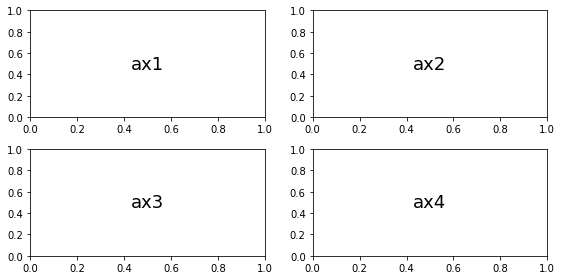

In [71]:
## Subplot example: Figure needs to be called.
fig = plt.figure(figsize=(8,4))

## Make 2x2 figure.
ax = plt.subplot(2,2,1)
ax.text(0.5,0.5,'ax1', fontsize=18, ha='center', va='center')

ax = plt.subplot(2,2,2)
ax.text(0.5,0.5,'ax2', fontsize=18, ha='center', va='center')

ax = plt.subplot(2,2,3)
ax.text(0.5,0.5,'ax3', fontsize=18, ha='center', va='center')

ax = plt.subplot(2,2,4)
ax.text(0.5,0.5,'ax4', fontsize=18, ha='center', va='center')

plt.tight_layout()

#### Subplots

The second function, `plt.subplots`, requires the user to define an *a priori* canvas layout but initializes all (equal sized) axes at once. 

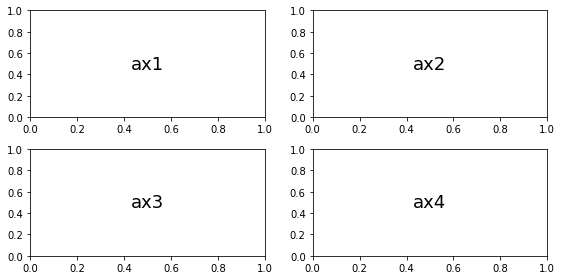

In [72]:
## Subplot example: Figure needs to be called.
fig, axes = plt.subplots(2,2,figsize=(8,4))

for i, ax in enumerate(axes.flatten()):
    ax.text(0.5,0.5,f'ax{i+1}',fontsize=18, ha='center', va='center')

plt.tight_layout()

#### Subplot2grid
With the third function, `plt.subplot2grid()`, the user defines geometry of the canvas and the location of the subplot in the grid. Importantly, this function allows for non-equal axis sizes. Here we present an example geometry for a 3x3 grid.

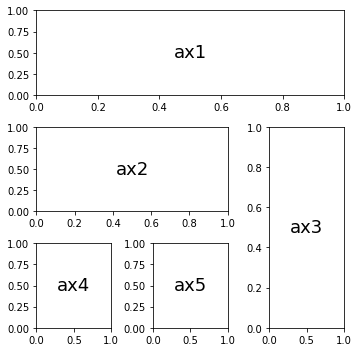

In [73]:
## subplot2grid example: Figure must be called.
fig = plt.figure(figsize=(5,5))

ax = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax.text(0.5,0.5,'ax1', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax.text(0.5,0.5,'ax2', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax.text(0.5,0.5,'ax3', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (2, 0))
ax.text(0.5,0.5,'ax4', fontsize=18, ha='center', va='center')

ax = plt.subplot2grid((3, 3), (2, 1))
ax.text(0.5,0.5,'ax5', fontsize=18, ha='center', va='center')

plt.tight_layout()

### Barplots
Barplots are probably the least intuitive plot in Matplotlib because the user must specify the starting point and width of the bars (this is in contrast to other languages that automatically assign x-coordinates to the bars). Though clunky, this does provide some additional control to the user. 

In this example, we will plot the average response within subjects.

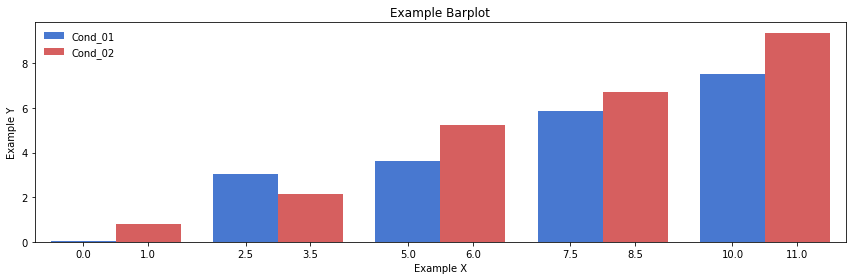

In [74]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Simulate data.
y = np.arange(10) + np.random.normal(0,0.5,10)
x = np.arange(10) + np.arange(10) // 2 * 0.5

## Plot bars.
ax.bar(x[::2], y[::2], width=1.0, color='#4878d0', label='Cond_01')
ax.bar(x[1::2], y[1::2], width=1.0, color='#d65f5f', label='Cond_02')

## Add details.
ax.set(xticks=x, xlim=(-0.75, 11.75), xlabel='Example X', ylabel='Example Y', title='Example Barplot')
ax.legend(loc=2, frameon=False)

plt.tight_layout();

### Lineplots
Lineplots are more intuitive than are barplots, requiring at the minimum only the x- and y-datapoints. Many tweaks and embellishments can similarly be added. 

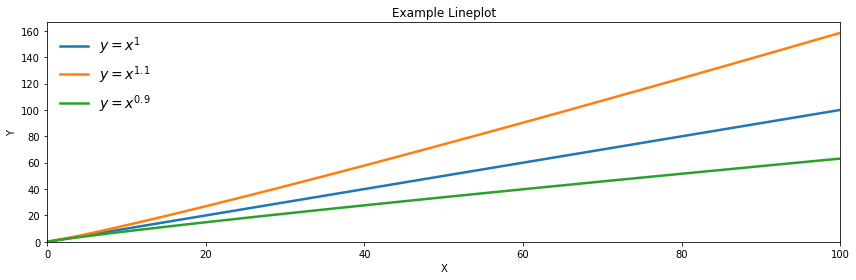

In [75]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Simulate data.
x = np.linspace(0,100,100)

## Plot lines.
for alpha in [1, 1.1, 0.9]:
    ax.plot(x, x**alpha, lw=2.5, label=r'$y = x^{%s}$' %alpha)

## Add details.
ax.set(xlim=(x.min(), x.max()), xlabel='X', ylim=(0), ylabel='Y', title='Example Lineplot')
ax.legend(loc=2, frameon=False, fontsize=14)

plt.tight_layout()

### Scatterplots
The synxtax of scatterplots is similar to that of lineplots. Whereas lineplots have different [linestyles](https://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html), scatterplots have different [marker styles](https://matplotlib.org/api/markers_api.html). 

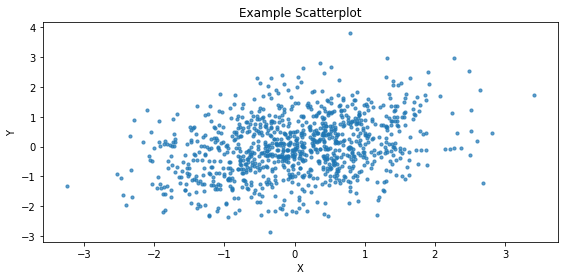

In [76]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))

## Simulate data.
mu = [0,0]
cov = [[1.0,0.4],[0.4,1.0]]
x, y = np.random.multivariate_normal(mu, cov, 1000).T

## Plot scatterplot.
ax.scatter(x, y, s=10, alpha=0.7)

## Add details.
ax.set(xlabel='X', ylabel='Y', title='Example Scatterplot')

plt.tight_layout()

### Histrograms
Histograms are very easy fortunately.

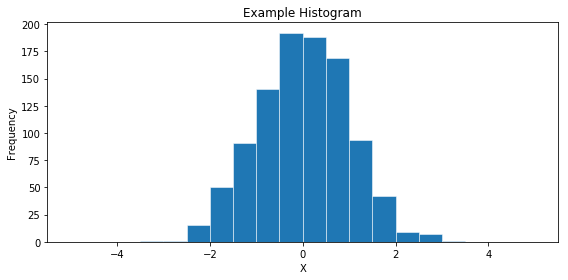

In [77]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))

## Plot scatterplot.
ax.hist(x, bins=np.linspace(-5,5,21), lw=0.5, edgecolor='w')

## Add details.
ax.set(xlabel='X', ylabel='Frequency', title='Example Histogram')

plt.tight_layout()

### Heatmaps
Heatmaps are very useful plots, but slightly counterintuitive in Matplotlib.

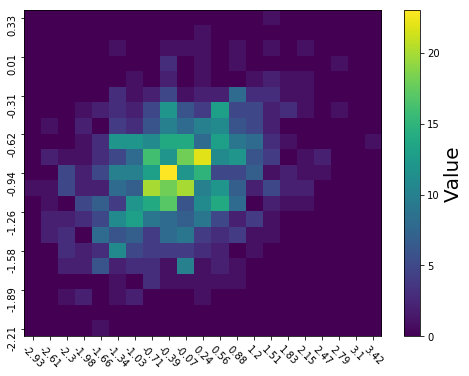

In [78]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,6))

## Compute 2d histogram.
counts, xbins, ybins = np.histogram2d(x,y,bins=21)

## Plot heatmap.
cbar = ax.imshow(counts, aspect='auto', origin='lower', vmin=0)

## Add details.
xticklabels = (xbins[:-1] + np.diff(xbins)).round(2)
yticklabels = (ybins[:-1] + np.diff(ybins)).round(2)
ax.set(xticks=np.arange(xticklabels.size))
ax.set_xticklabels(xticklabels, rotation=-45)
ax.set_yticklabels(yticklabels, rotation=90)

cbar = plt.colorbar(cbar, ax=ax);
cbar.ax.tick_params(labelsize=10) 
cbar.set_label('Value', fontsize=20)

### Gridspec plots

Gridspec objects are similar to subplot2grid in that they allow different sized plots within a figure. Gridspec objects also allow spacing configuration of axes within the figure. To give an example, we embed two sets of six plots with a large gap between them.

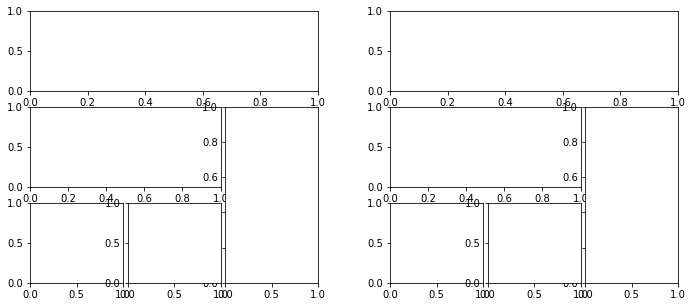

In [79]:
import matplotlib.gridspec as gridspec

## Initialize figure.
fig = plt.figure(figsize=(10,5))

## Define first 3x3 grid. 
gs = gridspec.GridSpec(3, 3)

## Update spacing parameters such that the figures can only
## extend to the 0.45 fraction of the figure.
gs.update(left=0.05, right=0.45, wspace=0.05)

## Create plots by indexing into grid.
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])

## Define second 3x3 grid. 
gs = gridspec.GridSpec(3, 3)

## Update spacing parameters such that the figures can only
## start at 0.55 fraction of the figure.
gs.update(left=0.55, right=0.95, wspace=0.05)

## Create plots by indexing into grid.
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, :-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1, 0])
ax5 = plt.subplot(gs[-1, -2])